In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path_outcomes = "london-police-records/london-outcomes.csv"
path_stop = "london-police-records/london-stop-and-search.csv"
path_streets = "london-police-records/london-street.csv"

In [3]:
#streets is for crime type
streets = pd.read_csv(path_streets)
streets.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [4]:
streets.shape


(2946479, 12)

In [ ]:
a

In [5]:
#stop is for police control
stop = pd.read_csv(path_stop, nrows=20)
stop.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [6]:
outcomes = pd.read_csv(path_outcomes, nrows=20)
outcomes.columns


Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type'],
      dtype='object')

In [10]:
len(streets['LSOA code'].unique())

6911

In [12]:
len(streets['LSOA name'].unique())

6911

In [7]:
streets.head(2)

Crime ID    Month  \
0  324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...  2014-06   
1  62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...  2014-06   

             Reported by           Falls within  Longitude   Latitude  \
0  City of London Police  City of London Police  -0.113767  51.517372   
1  City of London Police  City of London Police  -0.111497  51.518226   

                       Location  LSOA code    LSOA name  \
0    On or near Stone Buildings  E01000914  Camden 028B   
1  On or near Pedestrian Subway  E01000914  Camden 028B   

                     Crime type  \
0                 Vehicle crime   
1  Violence and sexual offences   

                           Last outcome category  Context  
0  Investigation complete; no suspect identified      NaN  
1                    Unable to prosecute suspect      NaN

In [8]:
stop.head(2)

Type                       Date  Part of a policing operation  \
0  Person search  2015-03-02T16:40:00+00:00                           NaN   
1  Person search  2015-03-02T16:40:00+00:00                           NaN   

   Policing operation  Latitude  Longitude Gender Age range  \
0                 NaN       NaN        NaN   Male     25-34   
1                 NaN       NaN        NaN   Male     25-34   

                      Self-defined ethnicity Officer-defined ethnicity  \
0  Asian or Asian British - Bangladeshi (A3)                     Asian   
1  Asian or Asian British - Bangladeshi (A3)                     Asian   

                                         Legislation Object of search  \
0  Police and Criminal Evidence Act 1984 (section 1)     Stolen goods   
1  Police and Criminal Evidence Act 1984 (section 1)     Stolen goods   

            Outcome Outcome linked to object of search  \
0  Suspect arrested                               True   
1  Suspect arrested                              False   

   Removal of more than just outer clothing  
0                                     False  
1                                     False

In [10]:
outcomes.head(2)

Crime ID    Month  \
0  b4adcc899360d595450a35cbe4d7d71d295bafefef98b2...  2014-06   
1  64b14e3efdf9e12425e3ac19f5e72b6d19b5656523d91b...  2014-06   

             Reported by           Falls within  Longitude   Latitude  \
0  City of London Police  City of London Police        NaN        NaN   
1  City of London Police  City of London Police  -0.088843  51.509532   

                  Location  LSOA code            LSOA name  \
0              No location        NaN                  NaN   
1  On or near Parking Area  E01032739  City of London 001F   

                                    Outcome type  
0                                Suspect charged  
1  Investigation complete; no suspect identified

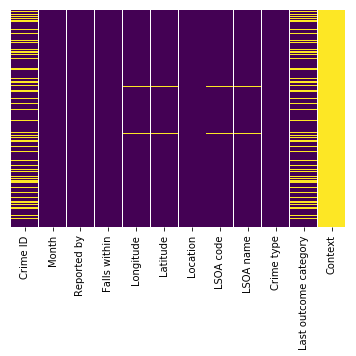

In [11]:
sns.heatmap(streets.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [4]:
streets = streets.drop(["Crime ID", "Context"],axis = 1)

In [5]:
streets.head(2)



Month            Reported by           Falls within  Longitude  \
0  2014-06  City of London Police  City of London Police  -0.113767   
1  2014-06  City of London Police  City of London Police  -0.111497   

    Latitude                      Location  LSOA code    LSOA name  \
0  51.517372    On or near Stone Buildings  E01000914  Camden 028B   
1  51.518226  On or near Pedestrian Subway  E01000914  Camden 028B   

                     Crime type                          Last outcome category  
0                 Vehicle crime  Investigation complete; no suspect identified  
1  Violence and sexual offences                    Unable to prosecute suspect

In [6]:
sns.set_style("whitegrid")

In [7]:
streets["Crime type"].unique()


array(['Vehicle crime', 'Violence and sexual offences',
       'Anti-social behaviour', 'Bicycle theft', 'Other theft',
       'Theft from the person', 'Other crime', 'Drugs', 'Burglary',
       'Public order', 'Shoplifting', 'Criminal damage and arson',
       'Robbery', 'Possession of weapons'], dtype=object)

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(' '.join(streets["Crime type"]))

# Generate plot
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [13]:
print (streets["Month"].max())

2017-05


In [14]:
print (streets["Month"].min())

2014-06


In [15]:
streets["Reported by"].unique()

array(['City of London Police', 'Metropolitan Police Service'], dtype=object)

In [8]:
streets1 = streets[["Month","Longitude","Latitude","Location",'LSOA code','LSOA name',"Crime type","Last outcome category"]]

print(streets1.shape)

streets1.head(5)

(2946479, 8)


Month  Longitude   Latitude                      Location  LSOA code  \
0  2014-06  -0.113767  51.517372    On or near Stone Buildings  E01000914   
1  2014-06  -0.111497  51.518226  On or near Pedestrian Subway  E01000914   
2  2014-06  -0.097601  51.520699  On or near Carthusian Street  E01000001   
3  2014-06  -0.097601  51.520699  On or near Carthusian Street  E01000001   
4  2014-06  -0.097601  51.520699  On or near Carthusian Street  E01000001   

             LSOA name                    Crime type  \
0          Camden 028B                 Vehicle crime   
1          Camden 028B  Violence and sexual offences   
2  City of London 001A         Anti-social behaviour   
3  City of London 001A         Anti-social behaviour   
4  City of London 001A         Anti-social behaviour   

                           Last outcome category  
0  Investigation complete; no suspect identified  
1                    Unable to prosecute suspect  
2                                            NaN  
3                                            NaN  
4                                            NaN

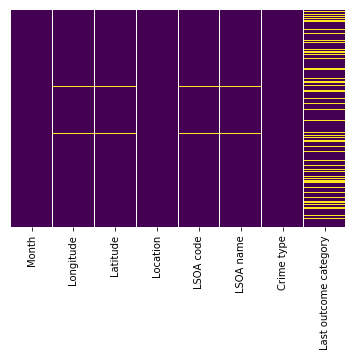

In [15]:
sns.heatmap(streets1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [9]:
streets2 = streets1.dropna(subset=["Longitude","Latitude",'LSOA code','LSOA name'])
print(streets2.shape)

streets2.head(2)

(2911801, 8)


Month  Longitude   Latitude                      Location  LSOA code  \
0  2014-06  -0.113767  51.517372    On or near Stone Buildings  E01000914   
1  2014-06  -0.111497  51.518226  On or near Pedestrian Subway  E01000914   

     LSOA name                    Crime type  \
0  Camden 028B                 Vehicle crime   
1  Camden 028B  Violence and sexual offences   

                           Last outcome category  
0  Investigation complete; no suspect identified  
1                    Unable to prosecute suspect

In [26]:
pd.Series(streets2['LSOA name'].unique()).to_csv("LSOA_name.csv")

In [ ]:
streets2.to_csv("dataset.csv")

In [23]:
test.head()

Month  Longitude   Latitude                      Location  \
0  2014-06  -0.113767  51.517372    On or near Stone Buildings   
1  2014-06  -0.111497  51.518226  On or near Pedestrian Subway   
2  2014-06  -0.097601  51.520699  On or near Carthusian Street   
3  2014-06  -0.097601  51.520699  On or near Carthusian Street   
4  2014-06  -0.097601  51.520699  On or near Carthusian Street   

                     Crime type                          Last outcome category  
0                 Vehicle crime  Investigation complete; no suspect identified  
1  Violence and sexual offences                    Unable to prosecute suspect  
2         Anti-social behaviour                                            NaN  
3         Anti-social behaviour                                            NaN  
4         Anti-social behaviour                                            NaN

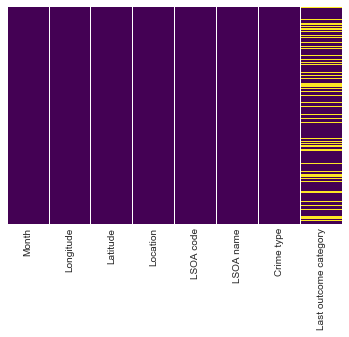

In [10]:
sns.heatmap(streets2.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [14]:
streets2['LSOA name'] = streets2['LSOA name'].map(lambda x : x.split())
streets2['LSOA name'] =streets2['LSOA name'].map(lambda x : " ".join(x[:-1]))

/home/aris/anaconda2/envs/Tensor/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/aris/anaconda2/envs/Tensor/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
streets2.to_csv("dataset.csv")

In [16]:
streets2.head()

Month  Longitude   Latitude                      Location  LSOA code  \
0  2014-06  -0.113767  51.517372    On or near Stone Buildings  E01000914   
1  2014-06  -0.111497  51.518226  On or near Pedestrian Subway  E01000914   
2  2014-06  -0.097601  51.520699  On or near Carthusian Street  E01000001   
3  2014-06  -0.097601  51.520699  On or near Carthusian Street  E01000001   
4  2014-06  -0.097601  51.520699  On or near Carthusian Street  E01000001   

        LSOA name                    Crime type  \
0          Camden                 Vehicle crime   
1          Camden  Violence and sexual offences   
2  City of London         Anti-social behaviour   
3  City of London         Anti-social behaviour   
4  City of London         Anti-social behaviour   

                           Last outcome category  
0  Investigation complete; no suspect identified  
1                    Unable to prosecute suspect  
2                                            NaN  
3                                            NaN  
4                                            NaN

In [44]:
#df = streets2.groupby('LSOA name')['Crime type'].value_counts()
# gr.count()
df = streets2.groupby(['LSOA name','Crime type']).count()
df

Month  Longitude  \
LSOA name              Crime type                                       
Adur                   Other theft                       4          4   
                       Violence and sexual offences      1          1   
Allerdale              Violence and sexual offences      1          1   
Arun                   Public order                      1          1   
                       Theft from the person             1          1   
                       Violence and sexual offences      5          5   
Ashford                Burglary                          1          1   
                       Drugs                             1          1   
                       Theft from the person             2          2   
                       Vehicle crime                     1          1   
                       Violence and sexual offences      5          5   
Aylesbury Vale         Criminal damage and arson         1          1   
                       Other crime                       2          2   
                       Other theft                       4          4   
                       Violence and sexual offences      8          8   
Babergh                Other theft                       1          1   
                       Violence and sexual offences      4          4   
Barking and Dagenham   Anti-social behaviour         15701      15701   
                       Bicycle theft                   679        679   
                       Burglary                       4713       4713   
                       Criminal damage and arson      5204       5204   
                       Drugs                          2376       2376   
                       Other crime                     662        662   
                       Other theft                    5861       5861   
                       Possession of weapons           257        257   
                       Public order                   2703       2703   
                       Robbery                        1610       1610   
                       Shoplifting                    2562       2562   
                       Theft from the person           973        973   
                       Vehicle crime                  6283       6283   
...                                                    ...        ...   
Windsor and Maidenhead Other theft                       9          9   
                       Possession of weapons            14         14   
                       Public order                      1          1   
                       Theft from the person             6          6   
                       Violence and sexual offences     13         13   
Wirral                 Violence and sexual offences      4          4   
Woking                 Other theft                       3          3   
                       Possession of weapons             1          1   
                       Theft from the person             1          1   
                       Vehicle crime                     1          1   
                       Violence and sexual offences      4          4   
Wokingham              Other theft                       1          1   
                       Vehicle crime                     2          2   
                       Violence and sexual offences      4          4   
Wolverhampton          Violence and sexual offences      8          8   
Worcester              Other theft                       1          1   
                       Violence and sexual offences      3          3   
Worthing               Vehicle crime                     1          1   
                       Violence and sexual offences      2          2   
Wrexham                Other crime                       1          1   
                       Vehicle crime                     1          1   
Wychavon               Violence and sexual offences      3          3   
Wycombe                Criminal damage

In [39]:
df.columns

AttributeError: 'Series' object has no attribute 'columns'

In [33]:
#streets2.head(2)
streets2['LSOA name'].unique()

array(['Camden', 'City of London', 'Islington', 'Southwark',
       'Tower Hamlets', 'Westminster', 'Hammersmith and Fulham', 'Hackney',
       'Thurrock', 'Castle Point', 'Havering', 'Kensington and Chelsea',
       'Barking and Dagenham', 'Barnet', 'Basildon', 'Bexley', 'Bolton',
       'Bournemouth', 'Brent', 'Bromley', 'Cheshire East', 'Crawley',
       'Croydon', 'Dacorum', 'Dartford', 'Ealing', 'Elmbridge', 'Enfield',
       'Epping Forest', 'Epsom and Ewell', 'Greenwich', 'Haringey',
       'Harrogate', 'Harrow', 'Hertsmere', 'Hillingdon', 'Hounslow',
       'Kingston upon Thames', 'Kirklees', 'Lambeth', 'Lancaster',
       'Lewisham', 'Luton', 'Merton', 'Newham', 'North Norfolk',
       'Redbridge', 'Reigate and Banstead', 'Richmond upon Thames',
       'Rochford', 'Rotherham', 'Ryedale', 'Sevenoaks', 'Sheffield',
       'Spelthorne', 'Stratford-on-Avon', 'Stroud', 'Sutton', 'Swale',
       'Swansea', 'Tandridge', 'Tendring', 'Tonbridge and Malling',
       'Torbay', 'Uttlesfor

In [25]:
test = streets2['LSOA name'].map(lambda x : x.split())
test = test.map(lambda x : " ".join(x[:-1]))
test.head()

0            Camden
1            Camden
2    City of London
3    City of London
4    City of London
Name: LSOA name, dtype: object

In [27]:
len(test.unique())

312

In [28]:
test.unique()

array(['Camden', 'City of London', 'Islington', 'Southwark',
       'Tower Hamlets', 'Westminster', 'Hammersmith and Fulham', 'Hackney',
       'Thurrock', 'Castle Point', 'Havering', 'Kensington and Chelsea',
       'Barking and Dagenham', 'Barnet', 'Basildon', 'Bexley', 'Bolton',
       'Bournemouth', 'Brent', 'Bromley', 'Cheshire East', 'Crawley',
       'Croydon', 'Dacorum', 'Dartford', 'Ealing', 'Elmbridge', 'Enfield',
       'Epping Forest', 'Epsom and Ewell', 'Greenwich', 'Haringey',
       'Harrogate', 'Harrow', 'Hertsmere', 'Hillingdon', 'Hounslow',
       'Kingston upon Thames', 'Kirklees', 'Lambeth', 'Lancaster',
       'Lewisham', 'Luton', 'Merton', 'Newham', 'North Norfolk',
       'Redbridge', 'Reigate and Banstead', 'Richmond upon Thames',
       'Rochford', 'Rotherham', 'Ryedale', 'Sevenoaks', 'Sheffield',
       'Spelthorne', 'Stratford-on-Avon', 'Stroud', 'Sutton', 'Swale',
       'Swansea', 'Tandridge', 'Tendring', 'Tonbridge and Malling',
       'Torbay', 'Uttlesfor

In [22]:
my_list = ["City", "of", "London", "001A"]
" ".join(my_list[:-1])

'City of London'

In [19]:
test.head()

0              [Camden, 028B]
1              [Camden, 028B]
2    [City, of, London, 001A]
3    [City, of, London, 001A]
4    [City, of, London, 001A]
Name: LSOA name, dtype: object

In [24]:
#sns.distplot(streets2["Month"],kde=False,bins=100)

In [25]:
streets2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2911801 entries, 0 to 2945451
Data columns (total 6 columns):
Month                    object
Longitude                float64
Latitude                 float64
Location                 object
Crime type               object
Last outcome category    object
dtypes: float64(2), object(4)
memory usage: 155.5+ MB


In [37]:
from datetime import datetime
#datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
streets2['Month'] =streets2['Month'].apply(lambda time : datetime.strptime(time,'%Y-%m'))


/home/aris/anaconda2/envs/Tensor/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [38]:
streets2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2911801 entries, 0 to 2945451
Data columns (total 6 columns):
Month                    datetime64[ns]
Longitude                float64
Latitude                 float64
Location                 object
Crime type               object
Last outcome category    object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 235.5+ MB


In [44]:
plt.figure(figsize=(15,10))
p = sns.countplot(x="Crime type", data = streets2)
p.set_xticklabels(p.get_xticklabels(),rotation=30)

/home/aris/anaconda2/envs/Tensor/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0,'Vehicle crime'),
 Text(0,0,'Violence and sexual offences'),
 Text(0,0,'Anti-social behaviour'),
 Text(0,0,'Bicycle theft'),
 Text(0,0,'Other theft'),
 Text(0,0,'Theft from the person'),
 Text(0,0,'Other crime'),
 Text(0,0,'Drugs'),
 Text(0,0,'Burglary'),
 Text(0,0,'Public order'),
 Text(0,0,'Shoplifting'),
 Text(0,0,'Criminal damage and arson'),
 Text(0,0,'Robbery'),
 Text(0,0,'Possession of weapons')]

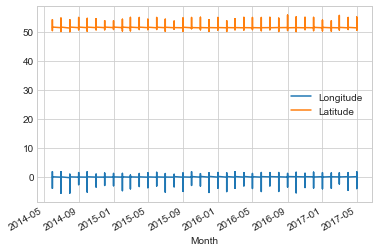

In [52]:
streets2.set_index('Month').plot()

In [7]:
streets3 = streets2.dropna()

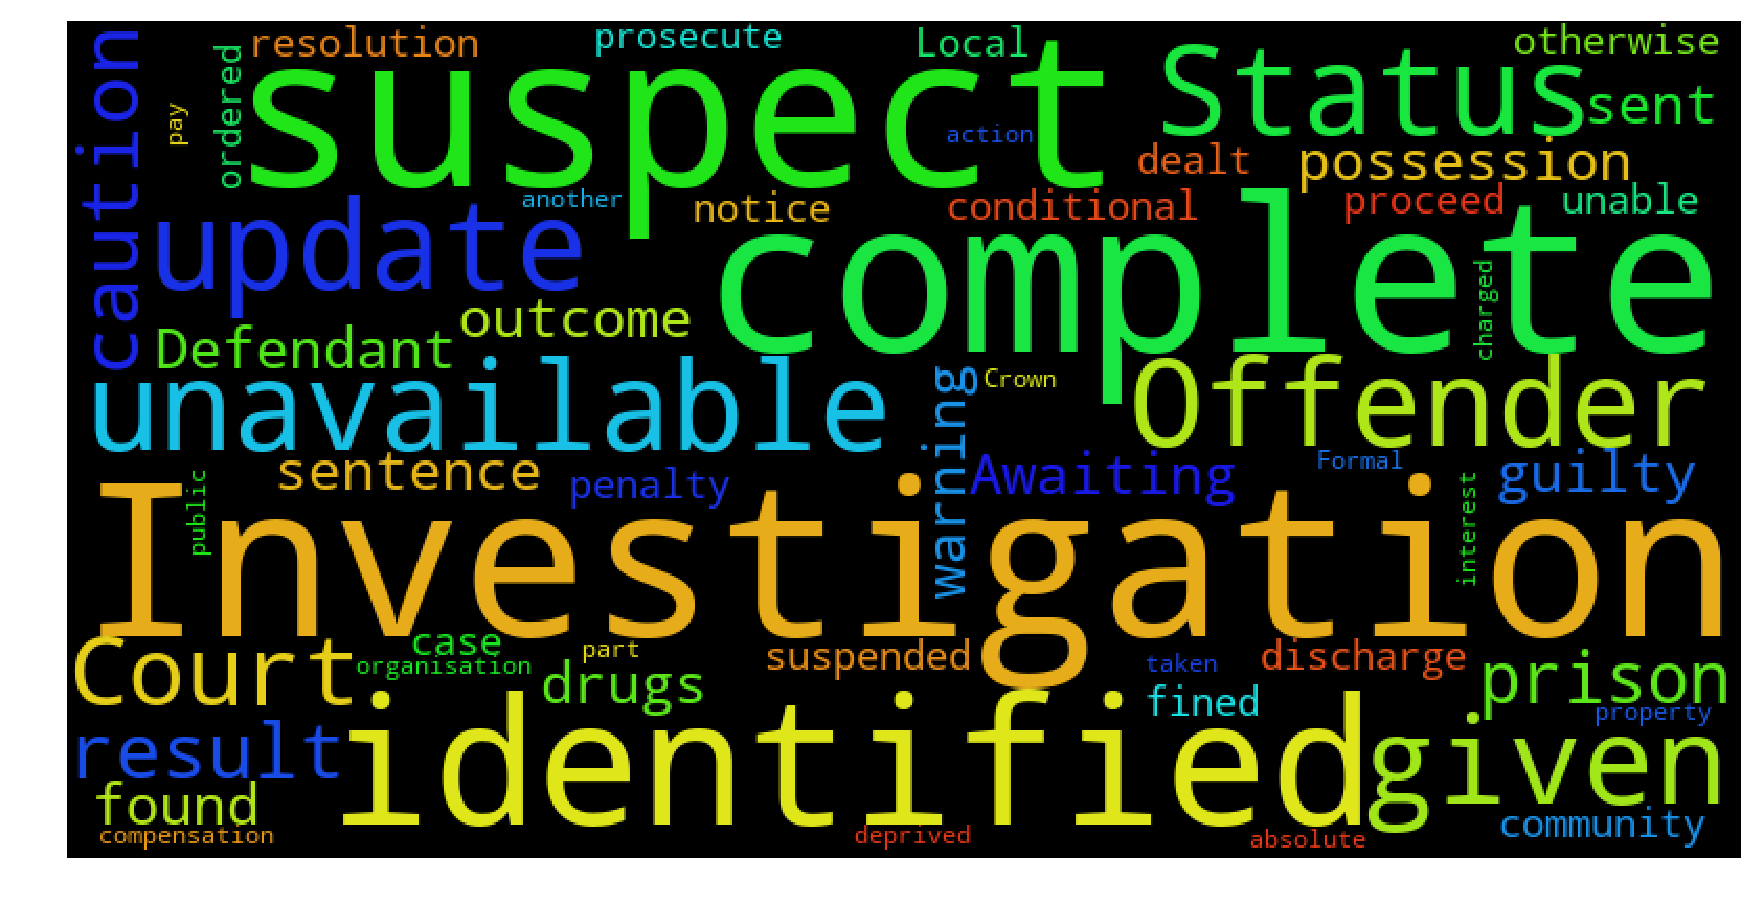

In [10]:
%config InlineBackend.figure_format = 'retina'
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(streets3["Last outcome category"]))

# Generate plot
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [18]:
#Saves the clean csv
streets2.to_csv("toy_data.csv", index=False)

In [ ]:
#Creates a json structure

In [38]:
%%bash
python parser.py -i toy_data.csv -o playground.json -f pretty


Traceback (most recent call last):
  File "parser.py", line 48, in <module>
    main(sys.argv[1:])
  File "parser.py", line 27, in main
    read_csv(input_file, output_file, format)
  File "parser.py", line 37, in read_csv
    write_json(csv_rows, json_file, format)
  File "parser.py", line 43, in write_json
    f.write(json.dumps(data, sort_keys=False, indent=4, separators=(',', ': '),encoding="utf-8",ensure_ascii=False))
  File "/home/aris/anaconda2/envs/Tensor/lib/python3.5/json/__init__.py", line 237, in dumps
    **kw).encode(obj)
TypeError: __init__() got an unexpected keyword argument 'encoding'


In [2]:
df2_crimes = pd.read_csv("london_crime_by_lsoa.csv")

In [3]:
print(df2_crimes.shape)
df2_crimes.head(2)

(13490604, 7)


lsoa_code    borough               major_category  \
0  E01001116    Croydon                     Burglary   
1  E01001646  Greenwich  Violence Against the Person   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11

In [5]:
df3_crimes = pd.read_csv('2017-08/2017-08-city-of-london-street.csv')

In [6]:
print(df3_crimes.shape)
df3_crimes.head(2)

(668, 12)


Crime ID    Month            Reported by           Falls within  Longitude  \
0      NaN  2017-08  City of London Police  City of London Police  -0.097277   
1      NaN  2017-08  City of London Police  City of London Police  -0.095960   

    Latitude                         Location  LSOA code            LSOA name  \
0  51.515307  On or near St Martin'S Le Grand  E01000001  City of London 001A   
1  51.517534           On or near London Wall  E01000001  City of London 001A   

              Crime type Last outcome category  Context  
0  Anti-social behaviour                   NaN      NaN  
1  Anti-social behaviour                   NaN      NaN

In [7]:
df3_crimes.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [27]:
streets2.head(2)

Month  Longitude   Latitude                      Location  LSOA code  \
0  2014-06  -0.113767  51.517372    On or near Stone Buildings  E01000914   
1  2014-06  -0.111497  51.518226  On or near Pedestrian Subway  E01000914   

  LSOA name                    Crime type  \
0    Camden                 Vehicle crime   
1    Camden  Violence and sexual offences   

                           Last outcome category  
0  Investigation complete; no suspect identified  
1                    Unable to prosecute suspect

In [29]:
visualization =  streets2[['Month','Crime type']]

In [30]:
visualization.head()

Month                    Crime type
0  2014-06                 Vehicle crime
1  2014-06  Violence and sexual offences
2  2014-06         Anti-social behaviour
3  2014-06         Anti-social behaviour
4  2014-06         Anti-social behaviour

In [36]:
final = visualization.groupby(['Month','Crime type']).size().reset_index()

In [37]:
final.head()

Month                 Crime type      0
0  2014-06      Anti-social behaviour  24246
1  2014-06              Bicycle theft   1611
2  2014-06                   Burglary   5359
3  2014-06  Criminal damage and arson   4961
4  2014-06                      Drugs   3407

In [42]:
final = final.rename(index=str,columns = {'Month':'Month','Crime type':'Crime type',0:'count'})

In [49]:
final.head(2)

Month             Crime type  count
0  2014-06  Anti-social behaviour  24246
1  2014-06          Bicycle theft   1611

In [54]:
final= final[['Crime type','count','Month']]

In [55]:
final.head(2)

Crime type  count    Month
0  Anti-social behaviour  24246  2014-06
1          Bicycle theft   1611  2014-06

In [70]:
final.to_csv("stream_dataset.csv")

In [59]:
final2 =final.sort_values('Month')

In [60]:
final2.head(2)

Crime type  count    Month
0          Anti-social behaviour  24246  2014-06
13  Violence and sexual offences  14714  2014-06

In [62]:
test = final2[final2['Crime type'] == 'Anti-social behaviour']

In [64]:
test['count'].sum()

707889

In [67]:
s = test['count'].sum()
test['count'] = test['count'].map(lambda x : x/s)



/home/aris/anaconda2/envs/Tensor/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [68]:
test.head()

Crime type     count    Month
0   Anti-social behaviour  0.034251  2014-06
14  Anti-social behaviour  0.039563  2014-07
28  Anti-social behaviour  0.032220  2014-08
42  Anti-social behaviour  0.031578  2014-09
56  Anti-social behaviour  0.030433  2014-10

In [69]:
test.to_csv("toydata.csv")